# **SRCNN模型：突破圖像超分辨率的卷積神經網絡**

---


## **專案前言**：

圖像超分辨率是一項關鍵的計算機視覺任務，旨在提高圖像的解析度，使其更清晰且更有用。卷積神經網絡（CNN）已經被廣泛應用於圖像超分辨率任務，其中SRCNN模型是其中一個卓越的代表。本專案旨在深入探討SRCNN模型的訓練和應用，以實現圖像超分辨率的突破。

## **專案目標簡介**：

本次作業的主要目標如下：

**（一）訓練SRCNN模型：**
1. 讀入預先訓練好的SRCNN模型權重檔（pth檔）。
2. 對SRCNN模型進行三次額外的訓練，以提升其性能。
3. 在每次訓練後，計算並展示訓練集的PSNR（Peak Signal-to-Noise Ratio）和驗證集的PSNR值，以評估模型的訓練進展。

**（二）測試模型性能：**
4. 使用已訓練完成的SRCNN模型對Set5和Set14測試集進行影像生成。
5. 計算並展示在Set5和Set14上的測試PSNR值，以評估模型的性能。

**（三）影像生成：**
6. 實現對已訓練完成的SRCNN模型輸入任何一張低解析度影像，並生成相對應的高解析度影像。
7. 展示生成的高解析度影像，以呈現SRCNN模型的實際應用效果。

透過這些目標，我們將深入理解SRCNN模型在圖像超解析度方面的性能，並實際應用它來提高圖像品質。這將有助於我們更好地理解和掌握卷積神經網路在影像處理中的應用。





---



以下是對原始程式碼的改進：

首先，對於訓練對象的改進，將原始的高清圖像作為輸出改為使用殘差圖像進行訓練。在圖像超分辨率任務中，殘差圖像是通過從原始低分辨率圖像中減去其對應的高分辨率圖像來獲得的。這樣做的目的是使模型學習捕捉圖像之間的細微差異，從而更好地恢復細節。

其次，對CNN模型進行優化。我嘗試以下兩個改進：

1. 使用更深的CNN：增加卷積層的數量可以增加模型的深度，提高其表示能力。更深的CNN可以學習到更複雜的特徵和模式，有助於提高圖像超分辨率的效果。

2. 使用較小的捲積核：較小的捲積核可以增加模型的 receptive field ，使其能夠更好地捕捉圖像中的細微紋理和邊緣信息。


---



## **SRCNN 入門介紹**

SRCNN（Super-Resolution Convolutional Neural Network）是一種深度學習模型，專注於解決圖像超分辨率重建的問題。

它能夠將低分辨率圖像恢復為具有更高解析度和更多細節的高分辨率圖像。

SRCNN的核心思想是利用深度卷積神經網絡來學習低分辨率圖像和對應高分辨率圖像之間的映射關係。

這種學習方式使得SRCNN能夠自動從大量的訓練數據中學習到圖像的細節和結構信息，並在重建過程中有效地恢復丟失的細節。

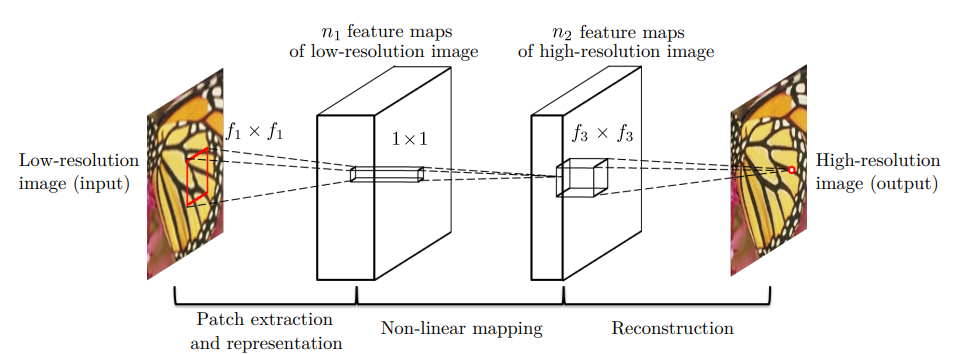

**引用自《Learning a Deep Convolutional Network for Image Super-Resolution》（ECCV2014）**

根據《Learning a Deep Convolutional Network for Image Super-Resolution》（ECCV2014）論文的描述，SRCNN模型採用了三個卷積層，這三個卷積層可以被解釋為三個步驟，分別是圖像塊的提取和特徵表示、特徵的非線性映射以及圖像的重建。

1. 圖像塊的提取和特徵表示：
在第一步中，低分辨率圖像Y首先通過雙三次插值被放大到目標尺寸。然後，通過第一個卷積層對放大後的圖像進行處理，提取圖像塊並對每個圖像塊進行特徵表示。這個卷積層的作用是對圖像進行初步的特徵提取和表示。

2. 特徵的非線性映射：
在第二步中，通過第二個卷積層對特徵圖進行非線性映射。這個卷積層引入了非線性激活函數，如ReLU（修正線性單元），以增強模型的非線性建模能力。非線性映射的目的是對圖像特徵進行更深入的提取和抽象，以捕捉更豐富的圖像信息。

3. 圖像的重建：
在第三步中，通過第三個卷積層對經過非線性映射的特徵圖進行處理，最終輸出高分辨率圖像的結果。這個卷積層的作用是將經過特徵提取和非線性映射的特徵圖轉化為最終的高分辨率圖像，完成圖像的重建過程。

通過這三個步驟，SRCNN模型能夠從低分辨率圖像中提取有效的特徵並進行非線性映射，從而實現高分辨率圖像的重建。這個模型的設計和訓練旨在提高圖像超分辨率的質量和準確性。

## **解壓縮程式碼**

來源：[SRCNN Implementation in PyTorch for Image Super Resolution](https://debuggercafe.com/srcnn-implementation-in-pytorch-for-image-super-resolution/)

In [ ]:
!unzip /content/drive/MyDrive/srcnn/SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution.zip

## **設定資料夾地址**

In [ ]:
%cd /content/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/src

/content/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/src


In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **patchify_image 生成殘差圖像--部分代碼**


```
# Convert to bicubic and save.
h, w, _ = patch.shape
low_res_img = cv2.resize(
    patch, (int(w*0.5), int(h*0.5)), interpolation=cv2.INTER_CUBIC
)

# Now upscale using BICUBIC.
high_res_upscale = cv2.resize(
    low_res_img, (w, h), interpolation=cv2.INTER_CUBIC
)

# Create residual image patch.
residual = cv2.subtract(patch, high_res_upscale)
cv2.imwrite(f"{out_re_path}/{image_name}_{counter}.png", residual)
```
這段程式碼的目的是為每個補丁圖像生成殘差圖像。

程式碼內容：
1. 將補丁圖像進行插值，得到低解析度圖像 `low_res_img`。

2. 將低解析度圖像進行插值放大，得到與原始補丁圖像相同尺寸的高解析度圖像 `high_res_upscale`。

3. 將原始補丁圖像 `patch` 減去高解析度圖像 `high_res_upscale`，得到殘差圖像 `residual`。

4. 殘差圖像 `residual` 代表了原始補丁圖像中的高頻細節信息。它反映了補丁圖像在插值放大過程中丟失的細節部分。

這個過程的目的是將原始圖像分解為低解析度圖像和高頻細節（殘差），以便在後續的處理中進行超解析度處理或其他相關任務。

透過這種方式，可以保留高頻細節信息並將其與低解析度圖像結合，從而提高圖像的視覺品質或進行其他處理。


---



## **圖像切分為小塊**

In [ ]:
!python patchify_image.py

Creating patches for 91 images
100% 91/91 [00:12<00:00,  7.54it/s]


In [ ]:
!python bicubic.py --path ../input/Set14/original ../input/Set5/original --scale-factor 2x


19
Scaling factor: 2x
Low resolution images save path: ../input/test_bicubic_rgb_2x
Original image dimensions: 352, 288
Original image dimensions: 512, 512
Original image dimensions: 529, 656
Original image dimensions: 500, 362
Original image dimensions: 512, 512
Original image dimensions: 720, 576
Original image dimensions: 768, 512
Original image dimensions: 500, 480
Original image dimensions: 276, 276
Original image dimensions: 512, 512
Original image dimensions: 250, 361
Original image dimensions: 586, 391
Original image dimensions: 512, 512
Original image dimensions: 352, 288
Original image dimensions: 280, 280
Original image dimensions: 288, 288
Original image dimensions: 228, 344
Original image dimensions: 256, 256
Original image dimensions: 512, 512




---



## **卷積神經網絡架構（CNN）**




```
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv9 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv10 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        out = self.relu(self.conv1(x))
        out = self.relu(self.conv2(out))
        out = self.relu(self.conv3(out))
        out = self.relu(self.conv4(out))
        out = self.relu(self.conv5(out))
        out = self.relu(self.conv6(out))
        out = self.relu(self.conv7(out))
        out = self.relu(self.conv8(out))
        out = self.relu(self.conv9(out))
        out = self.conv10(out)
        return out
```

以上是我設計的SRCNN超解析度圖像重建模型，它具有以下特點：

1. 深度卷積層架構：模型具有十個卷積層，這使得它能夠進行多層次的特徵提取和重建。這種深度結構有助於模型學習更複雜的圖像特徵和紋理。

2. 小型卷積核：每個卷積層使用3x3的小型卷積核，這有助於捕捉局部細節和特徵。相對於使用較大卷積核的模型，小型卷積核可以提供更精細的細節捕捉能力。

3. 非線性轉換：在每個卷積層之間使用ReLU激活函數，這導致模型具有非線性的特徵表示能力。這有助於模型從低解析度圖像中學習到更複雜的高解析度特徵。


---



## **訓練模型--對資料集進行 100 次完整的迭代。**

In [ ]:
!python train.py --epochs 100

SRCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
Training samples: 22227
Validation samples: 19
Epoch 1 of 100
100% 174/174 [00:23<00:00,  7.33it/s]
100% 19/19 [00:00<00:00, 20.67it/s]
Train PSNR: 32.920
Val PSNR: 33.273
Saving model...
Epoch

根據每個epoch的訓練集和驗證集的PSNR值，我們可以觀察到以下情況：

1. 訓練集PSNR值逐漸增加：從第一個epoch到最後一個epoch，訓練集的PSNR值逐漸增加，從32.920提高到35.425。這表明模型在訓練過程中逐漸學習到更好的重建能力，能夠生成與原始高分辨率圖像更接近的圖像。

2. 驗證集PSNR值波動：驗證集的PSNR值在不同的epoch之間會有一定的波動。從33.273到34.049之間的變化幅度不大。這可能表示模型在驗證集上的性能相對穩定，但也有可能是過擬合。

總結來說，根據提供的訓練過程，可以看出模型在訓練過程中逐漸提高了其重建能力，並在驗證集上保持了相對穩定的性能。然而，為了更全面地評估模型的性能，我們需要進一步觀察更多的訓練過程，包括更多的epoch數據以及測試集的PSNR值。


---



另一種可能的觀點是，儘管模型在訓練集上的性能持續提升，但在驗證集上的性能停留不前，這可能暗示著模型發生了過度擬合的現象。過度擬合意味著模型在訓練過程中過分追求對訓練數據的擬合，導致無法很好地泛化到新的數據。


---



## **讀入 pre-trained 的 pth 檔，再進行 3 次 training，並展示其  Train PSNR 與 Val PSNR 值。**

In [ ]:
!python train.py --weights ../outputs/model.pth --epochs 3


Loading weights to resume training...
SRCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
Training samples: 22227
Validation samples: 19
Epoch 1 of 3
100% 174/174 [00:29<00:00,  5.99it/s]
100% 19/19 [00:00<00:00, 20.72it/s]
Train PSNR: 36.524
Va

當在處理訓練時可能需要中止並重新訓練的情況時，讀入預訓練的 .pth 檔並進行進一步的訓練是一種常見的方法。這樣可以利用之前訓練的模型權重作為起點，節省重新訓練所需的時間和計算資源。

---



## ⛹ **測試 Set5 與 Set14 並展示 Test PSNR on Set5 與 Test PSNR on Set14。**

In [ ]:
!python test.py

100% 5/5 [00:07<00:00,  1.47s/it]
Test PSNR on Set5: 32.425
100% 14/14 [00:00<00:00, 32.27it/s]
Test PSNR on Set14: 28.609


在 Set5 上，測試 PSNR 的結果為 32.425，而在 Set14 上，測試 PSNR 的結果為 28.609。



---



## **對已訓練完成的 CNN 模型輸入任何一張影像，並生成相對應的一張高解度影像。**

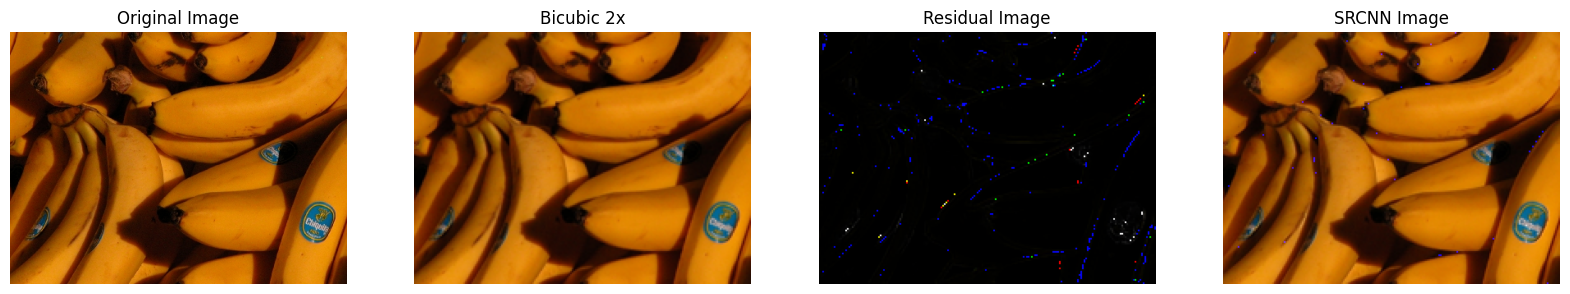

In [ ]:
from PIL import Image

import glob as glob
import os
import argparse

import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import srcnn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = srcnn.SRCNN().to(device)

# 載入權重
pretrained_dict = torch.load('/content/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/model.pth')


# 更新模型權重
model.load_state_dict(pretrained_dict)
model.eval()

# Bicubic插值函數
def bicubic_interpolation(image, scale_factor):
    width, height = image.size
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    return image.resize((new_width, new_height), Image.BICUBIC)

# 輸入影像路徑
input_image_path = '/content/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/input/T91/tt8.png'

# 預處理影像
preprocess = transforms.Compose([
    transforms.ToTensor()
])
input_image = Image.open(input_image_path).convert('RGB')

# 模糊化處理
input_image = bicubic_interpolation(input_image, 0.5)

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

# 使用模型進行預測
with torch.no_grad():
    output_batch = model(input_batch.to(device))

# 取得預測結果
output_tensor = output_batch.squeeze(0)
output_image = transforms.ToPILImage()(output_tensor)

result_tensor = torch.add(input_tensor.to(device), output_tensor.to(device))
result_image = transforms.ToPILImage()(result_tensor.squeeze(0))

# 載入原始影像
original_image = Image.open('/content/20220606_SRCNN_Implementation_in_PyTorch_for_Image_Super_Resolution/input/T91/tt8.png').convert('RGB')

# 顯示生成的高解析度影像
plt.figure(figsize=[20, 10])
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')
plt.subplot(1, 4, 2)
plt.title('Bicubic 2x')
plt.imshow(input_image)
plt.axis('off')
plt.subplot(1, 4, 3)
plt.title('Residual Image')
plt.imshow(output_image)
plt.axis('off')
plt.subplot(1, 4, 4)
plt.title('SRCNN Image')
plt.imshow(result_image)
plt.axis('off')
plt.show()


通過比較這些圖像，可以觀察到 SRCNN 模型能夠將低解析度影像恢復為更接近原始影像的高解析度影像。殘差影像呈現出高頻細節的部分，並且通過將其與低解析度影像相加，可以得到更銳利和清晰的 SRCNN 影像（香蕉的貼紙變清楚）。

對於殘差影像中亮度過高的情況，這可能是由於模型在訓練過程中對於高頻細節的恢復過程中產生了一些過度增強的效果。這可能會導致一些區域出現過亮的像素。


---



## **結語：**
總結一下，這個專案的目標是深入研究和應用SRCNN模型，這是在圖像超分辨率方面的一個卓越的卷積神經網絡。我們成功地進行了模型訓練、測試以及實際的影像生成，顯示了SRCNN模型在提高圖像品質和清晰度方面的優勢和應用價值。此專案有助於我們更好地了解和應用卷積神經網絡在影像處理中的作用，並為圖像處理領域的進一步研究和應用提供了有價值的參考。


---

